# HOMEWORK 2 ADM
###### Samin Hamidi, Egon Ferri, Davide Manfredini

In [1]:
#reading the libraries we need

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time

from sys import getsizeof as get
from collections import Counter

import folium
import json
import branca.colormap as cm
import os
from branca.colormap import linear
from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

## PRELIMINARY ANALYSIS
__We load our data file and take a glance__<br>

In [2]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv")

Size, shape, and basic charateristics of our data frame:

In [3]:
get(M1)

2855719028

In [4]:
print(M1.shape)

(8759874, 17)


In [5]:
M1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [6]:
M1.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


In [7]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


__We check to see if there are any NaN values in the month of January.__


In [8]:

#is there any NaN (not a number) values in the dataframe?
#Returns a dataframe of boolean values (true/false)
#M1.isnull()

#If we want to find only those columns which have NaN values
print(M1.isnull().any())

#one more any() will tell us if any of the above is true?
print(M1.isnull().any().any())


VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool
False


In [9]:
#another way to see if our dataframe has any NaN vales
M1.isnull().values.any()


False

__So we see that we have not NaN values. Looking at the dataframe we see that some cells have 0 value. We will see how to manage them.__

## RQ1
__In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).__

__We choose pickup boroughs.__<br>
__For this question, we need two columns. So, we drop the others.__<br>
__We keep 'tpep_pickup_datetime' and 'PULocationID'__<br>

In [10]:
M2 = M1.filter(['tpep_pickup_datetime', 'PULocationID'])
#free the memory from this big object that M1 is! 
del M1

In [11]:
M2.head(2)

,tpep_pickup_datetime,PULocationID
0,2018-01-01 00:21:05,41
1,2018-01-01 00:44:55,239


In [12]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 2 columns):
tpep_pickup_datetime    object
PULocationID            int64
dtypes: int64(1), object(1)
memory usage: 133.7+ MB


__We have two datetime objects. Let's convert them into usable data columns:  day, hour, minutes,..__

In [13]:
M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day

In [14]:
M2.head()

,tpep_pickup_datetime,PULocationID,pickup_day
0,2018-01-01 00:21:05,41,1
1,2018-01-01 00:44:55,239,1
2,2018-01-01 00:08:26,262,1
3,2018-01-01 00:20:22,140,1
4,2018-01-01 00:09:18,246,1


Drop the columns we don't need anymore.

In [15]:
M3 = M2.drop(columns = ['tpep_pickup_datetime'])

In [16]:
#Free up memory space 
del M2

In [17]:
M3.head()

,PULocationID,pickup_day
0,41,1
1,239,1
2,262,1
3,140,1
4,246,1


__Now we want to substitute 'PULocationID' with corrispondent Borough.__

In [18]:
#concatenate(join/merge)M3 and taxi_zone_lookup dataframe

#read taxi_zone_lookup.csv
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv")

In [19]:
borough.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


__The key column is 'LocationID' in boroughs and 'PULocationID' in M3. They contain the same content.__

In [20]:
result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()

,PULocationID,pickup_day,LocationID,Borough
0,41,1,41,Manhattan
1,41,1,41,Manhattan
2,41,1,41,Manhattan
3,41,1,41,Manhattan
4,41,1,41,Manhattan


In [21]:
M4 = result.drop(['LocationID'], 1)
M4.head()

,PULocationID,pickup_day,Borough
0,41,1,Manhattan
1,41,1,Manhattan
2,41,1,Manhattan
3,41,1,Manhattan
4,41,1,Manhattan


In [22]:
del result 

__Now, we need to use groupby function. We need the average frequency of taxis used in each day and for each borough seperately.__<br> 

__First, we group by based on boroughs.__<br>


In [23]:
M4.groupby(['Borough']).groups.keys()

dict_keys(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown'])

In [24]:
s = M4.groupby('Borough')['pickup_day'].count()

__Now we create a list of averages of each borough  and append to the list the cumulative value of New York City.__

In [25]:
borAvgs=[]
for i in range (7):
    borAvgs.append(s[i]//31)
NYAvgs=sum(borAvgs)
borAvgs.append(NYAvgs)

In [26]:
print(borAvgs)
print(NYAvgs)

[238, 3233, 18, 256958, 16996, 4, 5126, 282573]
282573



__We create a dataframe to store the analysis.__

In [27]:
columns=[]
index= ['Bronx','Brooklyn','EWR','Manhattan','queens','Staten Island','Unknow', 'NYC']
df=pd.DataFrame(index=index, columns=columns) 

In [28]:
df

""
Bronx
Brooklyn
EWR
Manhattan
queens
Staten Island
Unknow
NYC


In [29]:
df['January']=borAvgs


In [30]:
df

,January
Bronx,238
Brooklyn,3233
EWR,18
Manhattan,256958
queens,16996
Staten Island,4
Unknow,5126
NYC,282573


__Now we want to repeat and store our analysis for each month__

In [31]:
months=[' ','January','February','March','April','May','June']
for i in range(2,7):
    M1= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv", encoding = 'latin-1')
    M2 = M1.filter(['tpep_pickup_datetime', 'PULocationID'])
    del M1
    M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day
    M3 = M2.drop(columns = ['tpep_pickup_datetime'])
    result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    M4 = result.drop(['LocationID'], 1)
    M4.groupby(['Borough']).groups.keys()
    s = M4.groupby('Borough')['pickup_day'].count()
    borAvgs=[]
    for j in range (7):
        if months[i] == 'March' or months[i] == 'May':
            borAvgs.append(s[j]//31)
        if months[i] == 'February':
            borAvgs.append(s[j]//28)
        if months[i] == 'April' or months[i] == 'June':
            borAvgs.append(s[j]//30)
    NYAvgs=sum(borAvgs)
    borAvgs.append(NYAvgs)
    df[months[i]]=borAvgs


In [32]:
df

,January,February,March,April,May,June
Bronx,238,234,333,347,350,340
Brooklyn,3233,3396,3965,3969,3961,4098
EWR,18,17,21,23,24,22
Manhattan,256958,277424,276408,280959,269354,262626
queens,16996,17304,18221,19877,19704,19158
Staten Island,4,3,4,4,4,5
Unknow,5126,4907,5251,5001,4150,4209
NYC,282573,303285,304203,310180,297547,290458


__We transpose the dataframe to get plot of the keys that we want (boroughs).__

In [33]:
df_tra=df.T
df_tra

,Bronx,Brooklyn,EWR,Manhattan,queens,Staten Island,Unknow,NYC
January,238,3233,18,256958,16996,4,5126,282573
February,234,3396,17,277424,17304,3,4907,303285
March,333,3965,21,276408,18221,4,5251,304203
April,347,3969,23,280959,19877,4,5001,310180
May,350,3961,24,269354,19704,4,4150,297547
June,340,4098,22,262626,19158,5,4209,290458


__We plot some graphs to get a good visualization of our problem.<br>__

__Graph of taxis taken in New York in each month:<br>__

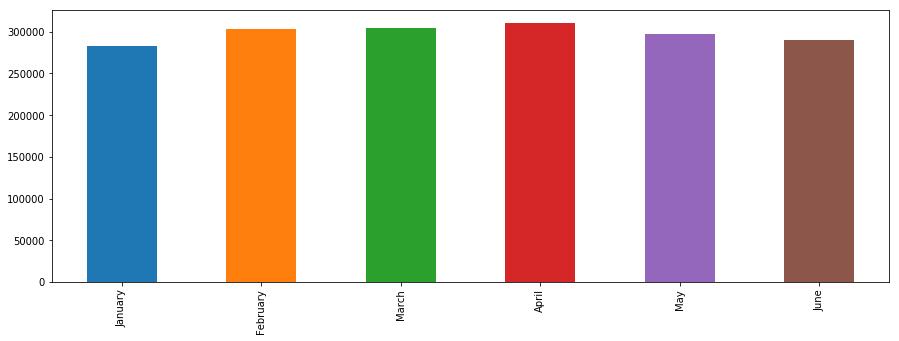

In [34]:
df_tra['NYC'].plot(kind='bar', figsize=(15,5))


__Graph of taxis taken in New York in each month in each borough.__

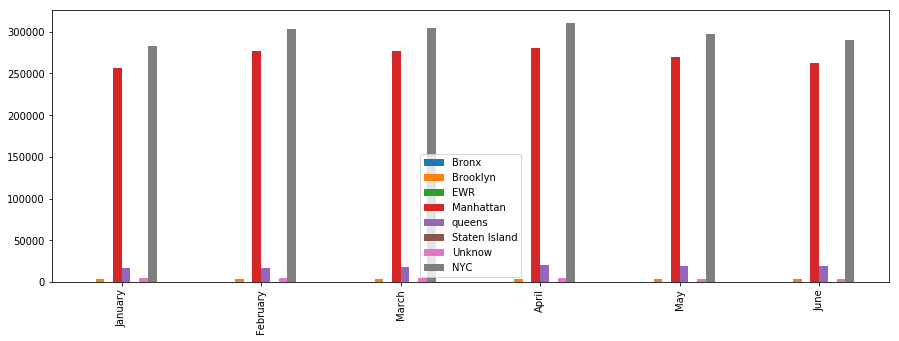

In [35]:
df_tra.plot(kind='bar', figsize=(15,5))

Another one:

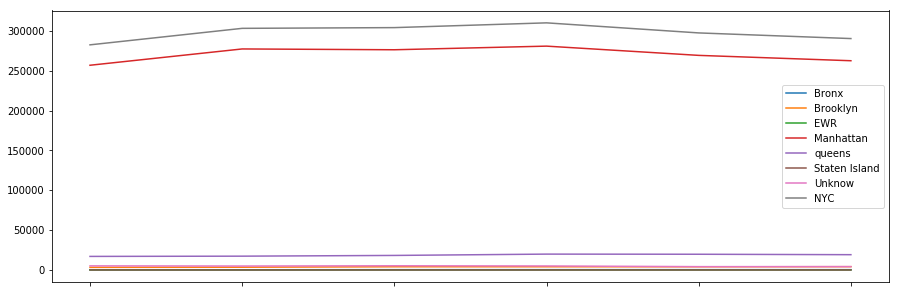

In [36]:
df_tra.plot(kind='line', figsize=(15,5))

__Unfortunatly these plots don't give us a very good representation becouse Boroughs are very differents from each other in average number of Taxis, so they don't fit well in a unique graph. However we can describe some minor common patterns.__

## OBSERVATIONS
-  __As it's easy to see from our data frame and from our graphs, Manhattan has the highest trafic of taxis in each of six month compared to other boroughs.__<br> 
-  __Another thing observable, is that pick ups in January and June are less frequent. April is the month with the highest number of pick ups.__<br><br><br>

## RQ3
__Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).__<br>

__The first that we want is to intialize empty data frames for Nyc and for each boroughs.__

In [37]:
index=['Short','Short/Medium','Medium','Medium/Long','Long','Very Long']
col=[]
months=[' ','January','February','March','April','May','June']
nycdf = pd.DataFrame(index=index, columns=col)
bronx_df = pd.DataFrame(index=index, columns=col)
brooklyn_df = pd.DataFrame(index=index, columns=col)
ewr_df = pd.DataFrame(index=index, columns=col)
manhattan_df = pd.DataFrame(index=index, columns=col)
queens_df = pd.DataFrame(index=index, columns=col)
staten_island_df = pd.DataFrame(index=index, columns=col)
unknown_df = pd.DataFrame(index=index, columns=col)

##### New York analysis 

In [38]:
for i in range(1,7):
    #We use a loop in order to pick data from each dataset
    M1=pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1')
    #We Clean it, saving only this columns.
    M2 = M1.filter(['tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID'])
    #read the file with ID of each boroughs and merge it with the cleaned Df, after I removed the column PULocation ID
    #because we don't need it
    borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')
    result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    df=result.drop('PULocationID',axis=1)
    del result 
    #For each trip I compute the duration of the trip
    format_date='%Y-%m-%d %H:%M:%S'
    pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
    dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
    difference=(dropoff-pickup).astype('timedelta64[m]')
    df['Duration']=difference
    #Then I put each trip in a category
    l=[]
    for ele in df['Duration']:
        if ele<=10:
            l.append('Short')
        if 10<ele<=20:
            l.append('Short/Medium')
        if 20<ele<=30:
            l.append('Medium')
        if 30<ele<=40:
            l.append('Medium/Long')
        if 40<ele<=50:
            l.append('Long')
        if ele>50:
            l.append('Very Long')
            
    df['Trip type']=l
    #Now the date of pickup and dropoff are unnecessary so I remove them
    df=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
    
    #We compute the number of each trip with Counter 
    d=Counter(l)
    c=[]
    for ind in index:
        if ind not in d:
            c.append(0)
        else:
            c.append(d[ind])
    #We store results in a dataframe
    nycdf[months[i]]=c

Now we have our dataframe.

In [39]:
nycdf

,January,February,March,April,May,June
Short,4659268,4478160,4885675,4616870,4412217,4233733
Short/Medium,2689383,2628352,2866181,2892146,2877496,2711580
Medium,884029,869236,984822,1047933,1084813,1002209
Medium/Long,300755,298614,359627,393228,425440,381506
Long,115888,116005,158084,172589,193717,178363
Very Long,110551,101709,175987,182749,230380,206440


Let's plot it!

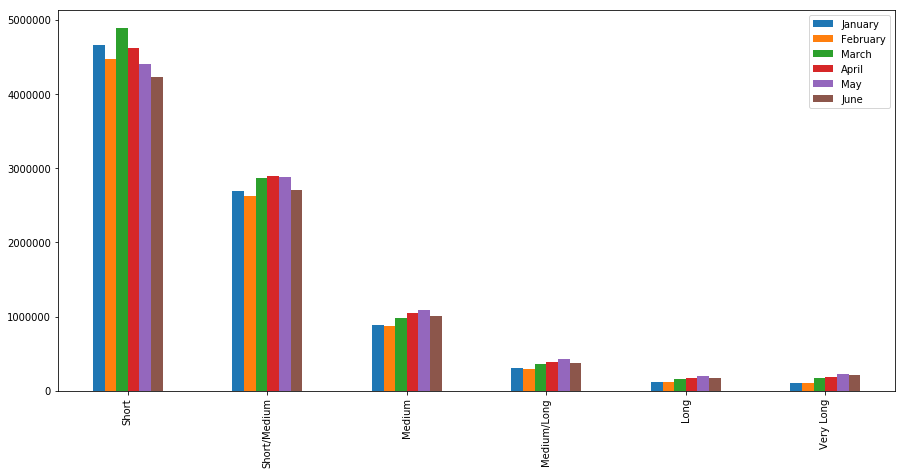

In [40]:
nycdf.plot.bar(figsize=(15,7))

##### Boroughs analysis 

__We repeat same analysis for each boroughs.__

In [41]:
months=[' ','January','February','March','April','May','June']
bor=['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']
for i in range(1,7):
    M1=pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1')
    #Clean it saving only this column
    
    M2 = M1.filter(['tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID'])
    #read the file with ID of each boroughs and merge it with the cleaned Df, after I removed the column PULocation ID
    #because we don't need it
    
    borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')
    result = pd.merge(M2,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    df=result.drop('PULocationID',axis=1)
    del result 
    
    #For each trip I compute the duration of the trip
    format_date='%Y-%m-%d %H:%M:%S'
    pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
    dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
    difference=(dropoff-pickup).astype('timedelta64[m]')
    
    df['Duration']=difference
    for b in bor:
        s =df.loc[df['Borough'] == b]
        #Then I put each trip in a category
        l=[]
        for ele in s['Duration']:
            if ele<=10:
                l.append('Short')
            if 10<ele<=20:
                l.append('Short/Medium')
            if 20<ele<=30:
                l.append('Medium')
            if 30<ele<=40:
                l.append('Medium/Long')
            if 40<ele<=50:
                l.append('Long')
            if ele>50:
                l.append('Very Long')
        s['Trip type']=l
        #Now the date of pickup and dropoff are unnecessary so I remove them
        s=s.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
        #I compute the number of each trip, using the category
        d=Counter(l)
        c=[]
        for ind in index:
            if ind not in d:
                c.append(0)
            else:
                c.append(d[ind])
        if b == 'Bronx':
            bronx_df[months[i]]=c
        if b == 'Brooklyn':
            brooklyn_df[months[i]]=c
        if b == 'EWR':
            ewr_df[months[i]]=c 
        if b == 'Manhattan':
            manhattan_df[months[i]]=c
        if b == 'Queens':
            queens_df[months[i]]=c
        if b == 'Staten Island':
            staten_island_df[months[i]]=c 
        if b == 'Unknown':
            unknown_df[months[i]]=c

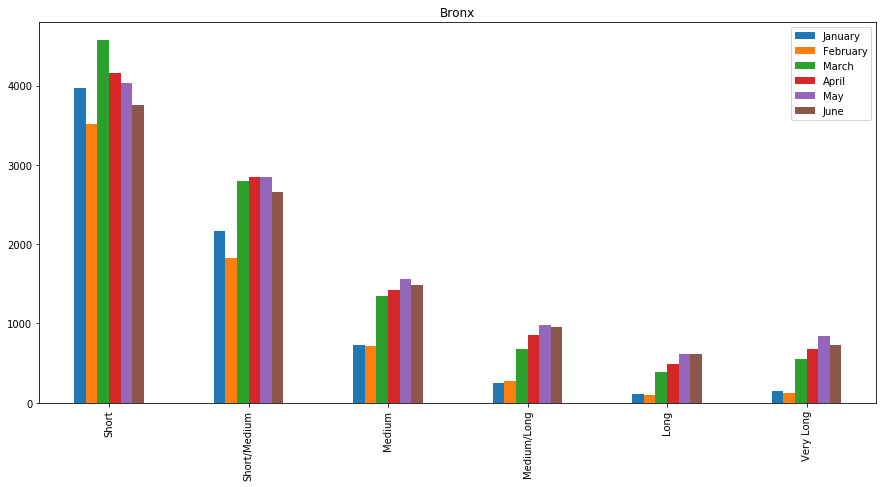

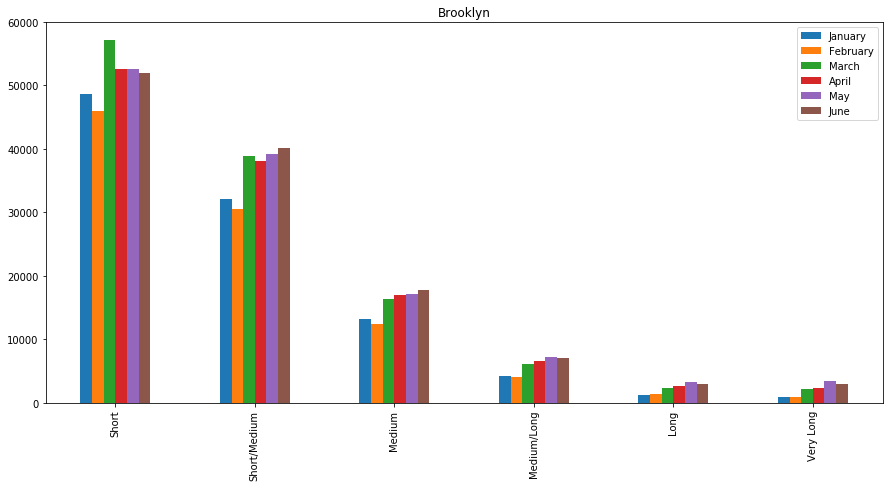

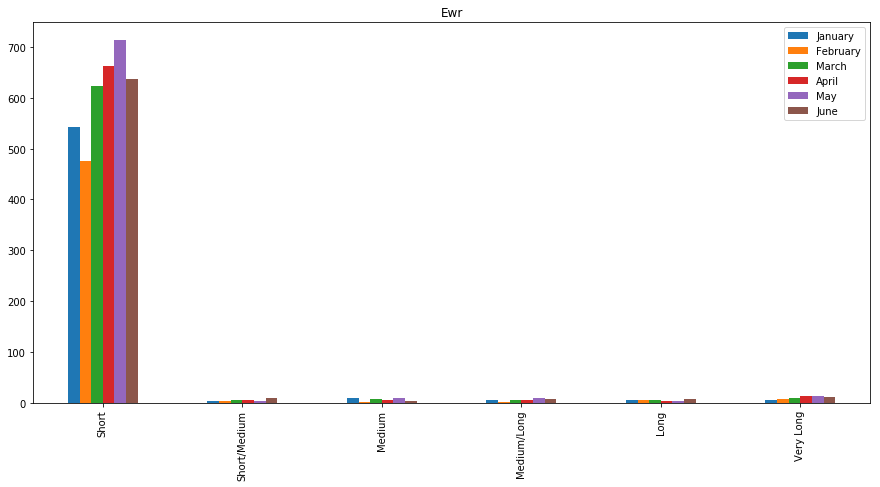

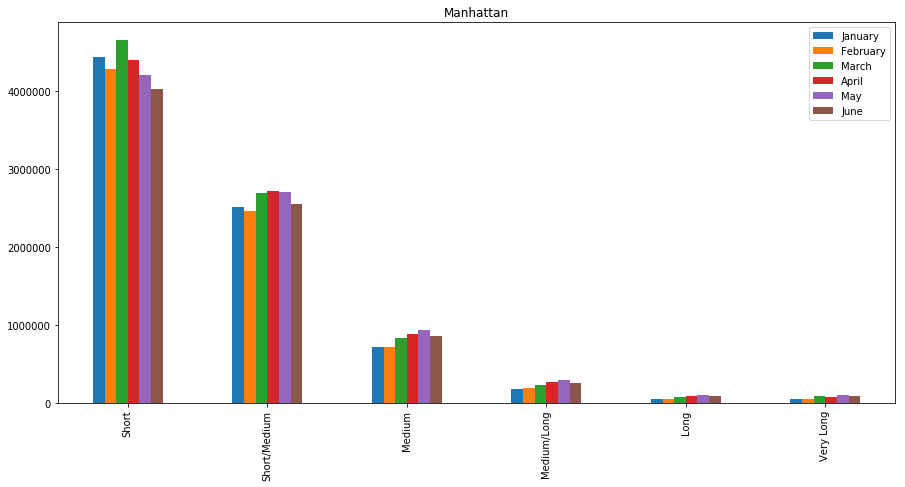

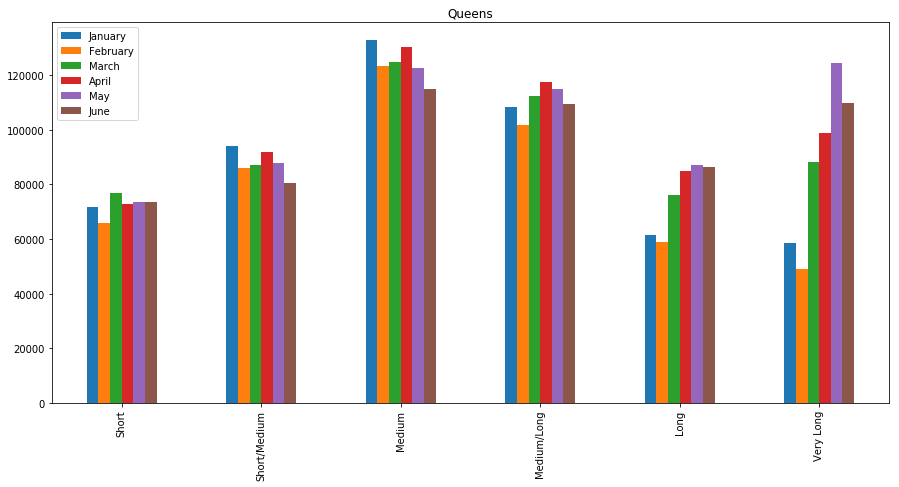

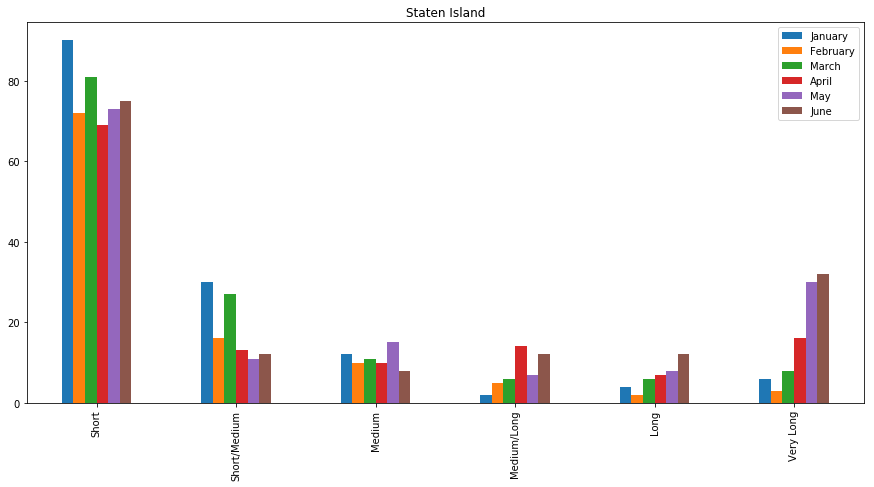

In [42]:
bronx_df.plot.bar(figsize=(15,7), title= 'Bronx')
brooklyn_df.plot.bar(figsize=(15,7), title= 'Brooklyn')
ewr_df.plot.bar(figsize=(15,7), title= 'Ewr')
manhattan_df.plot.bar(figsize=(15,7), title= 'Manhattan')
queens_df.plot.bar(figsize=(15,7), title= 'Queens')
staten_island_df.plot.bar(figsize=(15,7), title= 'Staten Island')

## OBSERVATIONS
-  __We see that most common trips are the short trips (0-10) min. The number of trips decreases with the duration.__<br>
 
-  __Almost all the boroughs follow the same distro of New York. In Queens we have a strange peak in medium trips. EWR has almost every trips dureation between (0-10) minutes. These doesn't make sense to us, since trips from the airport should not behave this way. Probably it is a bug in the registration system of taxi trips.__<br><br><br>

## RQ4
 __What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.__

__The pickup boroughs are taken into consideration.__<br>
__To answer this question, we need two columns: payment_type, PULocationID.__<br>



In [43]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv",  usecols=['payment_type', 'PULocationID'])

In [44]:
M1.head()

,PULocationID,payment_type
0,41,2
1,239,2
2,262,1
3,140,2
4,246,1


__FROM THE LEGEND OF THE COLUMN WE KNOW WHAT EACH NUMERIC CODE MEANS:<br>__

1. Credit card
2.  Cash
3.  No charge
4. Dispute
5. Unknown
6. Voided trip

__Now we want Boroughs instead of 'PULocationID':__

In [45]:
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv")
result = pd.merge(M1,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
M2 = result.drop(['LocationID','PULocationID'],1)
M2.head()

,payment_type,Borough
0,2,Manhattan
1,2,Manhattan
2,2,Manhattan
3,1,Manhattan
4,1,Manhattan


__Now that we have our df, we start to look at it.__


In [46]:
M2.describe(include='all')

,payment_type,Borough
count,8.759874e+06,8759874
unique,NaN,7
top,NaN,Manhattan
freq,NaN,7965703
mean,1.310611e+00,NaN
std,4.817818e-01,NaN
min,1.000000e+00,NaN
25%,1.000000e+00,NaN
50%,1.000000e+00,NaN
75%,2.000000e+00,NaN


__As we see, payment type are treated as nummerical data we would like to have that as a cathegory.__

In [47]:
columns=[]
index= [0,1,2,3,4,5]
typeofpay=pd.DataFrame(index=index, columns=columns)
ID=list(range(1,7))
typeofpay['ID']=ID
typeofpay['wayofpay']=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip']
typeofpay

,ID,wayofpay
0,1,Credit card
1,2,Cash
2,3,No charge
3,4,Dispute
4,5,Unknown
5,6,Voided trip


__Now we have a df that we can merge with our data.__

In [48]:
df= pd.merge(M2,
              typeofpay,
              left_on='payment_type',
              right_on='ID',
              how='inner')
df=df.drop(['payment_type'], 1)
df.head()

,Borough,ID,wayofpay
0,Manhattan,2,Cash
1,Manhattan,2,Cash
2,Manhattan,2,Cash
3,Manhattan,2,Cash
4,Manhattan,2,Cash


__Now we can rerun describe to extract some info.__

In [49]:
df.wayofpay.describe()

count         8759874
unique              4
top       Credit card
freq          6105871
Name: wayofpay, dtype: object

In [50]:
df.wayofpay.unique()

array(['Cash', 'Credit card', 'No charge', 'Dispute'], dtype=object)

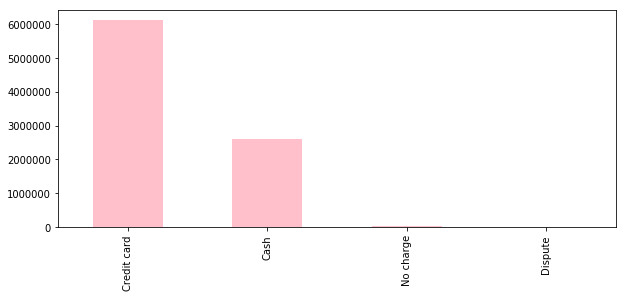

In [51]:
df['wayofpay'].value_counts().plot(kind='bar', figsize=(10,4), color='pink')

__Now we know something more: Credit card is by far (more than 60% of the payments) the most common way to pay.<br>__ 
__Almost the totality of the other fairs is payed in cash.__<br>
__Our dataframe has only four unique value: Unknown and voided trip are missing.__<br>

Borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
EWR              AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Unknown          AxesSubplot(0.125,0.125;0.775x0.755)
Name: ID, dtype: object

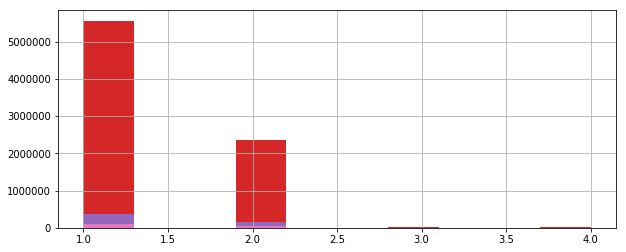

In [52]:
df.groupby('Borough')['ID'].hist(figsize=(10,4))

__From this quick graphical analisys we can't see any correlation between borough and way of payments, but we have to run a chi-squared test to be sure.__

__We create a dataframe with wayofpay as rows and Boroughs as columns.__

In [53]:
columns=['Bronx', 'Brooklyn', 'Manhattan', 'Queens'] #excluding EWR, uknonwn and Staten Island for scarsity of statistical relevance
index= ['Cash', 'Credit card', 'No charge', 'Dispute','Total']
tab=pd.DataFrame(index=index, columns=columns)
for i in columns:
    k= pd.DataFrame(df[df['Borough'] == i]).groupby('wayofpay')
    s= k['Borough'].count()
    s= list(s)
    s.append(sum(s))
    tab[i]=s

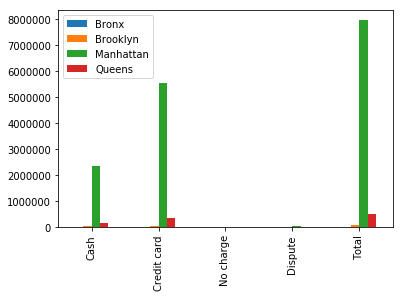

In [54]:
tab.plot(kind='bar')

In [55]:
tot=[]
for i in range (5):
    som=tab.Bronx[i]+tab.Brooklyn[i]+tab.Manhattan[i]+tab.Queens[i]
    tot.append(som)
tab['Total']=tot
observed= tab.iloc[0:4,0:4]   # Get table without totals for later use
observed

,Bronx,Brooklyn,Manhattan,Queens
Cash,4114,35339,2356898,154704
Credit card,2939,63280,5564803,365207
No charge,65,311,9762,1298
Dispute,271,1320,34240,5697


In [56]:
tab

,Bronx,Brooklyn,Manhattan,Queens,Total
Cash,4114,35339,2356898,154704,2551055
Credit card,2939,63280,5564803,365207,5996229
No charge,65,311,9762,1298,11436
Dispute,271,1320,34240,5697,41528
Total,7389,100250,7965703,526906,8600248


__Now that we have our data frame, we can perform our chi-squared test__<br> 

-  H0: Type of payment is not associated with Borough, and

- H1: Type of payment is associated with Borough.

First thing we calculate the df of expected values


In [57]:
expected =  np.outer(tab["Total"][0:4],
                     tab.loc["Total"][0:4]) / 8600248

expected = pd.DataFrame(expected)

expected.columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens']
expected.index = ['Cash', 'Credit card', 'No charge', 'Dispute']

expected

,Bronx,Brooklyn,Manhattan,Queens
Cash,2191.767655,29736.731284,2.362833e+06,156293.886622
Credit card,5151.727727,69895.886404,5.553814e+06,367367.201210
No charge,9.825368,133.305342,1.059223e+04,700.642239
Dispute,35.679249,484.076971,3.846397e+04,2544.269929


In [58]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

#We call .sum() twice:once to get the column sums and a second time to add the column sums together,
#returning the sum of the entire 2D table.
print(chi_squared_stat)

12870.606976136387


In [59]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 9)   # Degrees of fredom for a test of independence equals the product of the number of categories
                                # in each variable minus 1. In this case we have a 4x4 table so df = 3x3 = 9.

print("Critical value")
print(crit)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=9)
print("P value")
print(p_value)

Critical value
16.918977604620448
P value
0.0


__We could use directly scipy to conduct a test of independence quickly.__<br> 
__Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts:__<br>

In [60]:
stats.chi2_contingency(observed= observed)

(12870.606976136387,
 0.0,
 9,
 array([[2.19176766e+03, 2.97367313e+04, 2.36283261e+06, 1.56293887e+05],
        [5.15172773e+03, 6.98958864e+04, 5.55381418e+06, 3.67367201e+05],
        [9.82536829e+00, 1.33305342e+02, 1.05922271e+04, 7.00642239e+02],
        [3.56792492e+01, 4.84076971e+02, 3.84639739e+04, 2.54426993e+03]]))

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.<br><br>

### RESULTS

__The chi-squared test statistic is 12870.6 (very far away from the critical value of 16) with an associated p < 0.001.
(.000 should not be interpreted as exactly zero, as in the computer print-out.)__<br>

__The null hypothesis is rejected, since p < 0.001, and a conclusion is made that way of payment is associated with borough. Examining the pattern of numbers it is noted that in Brooklyn, Bronx and Queens there are a lot more of dispute than as we would expect.__<br>

__We can also denote that in Bronx and in Brooklyn, in respect to other boroughs, there is a preference for cash over credit cards. In manatthan, viceversa, there is a preference for credit cards in respect to cash money.__<br>

###### RUN SAME ANALYSIS FOR EACH MONTH IN ORDER TO CONFIRM OUR RESULTS
We can now run same analysis for each month.

In [61]:
chisq=stats.chi2_contingency(observed= observed)
chisq=list(chisq)
columns=[]
index= ['chisq', 'p_value']
dfMonths=pd.DataFrame(index=index, columns=columns)
dfMonths['Jan']=chisq[0:2]

In [62]:
months=[' ','Jan','Feb','Mar','Apr','May','Jun']
for i in range(2,7):
    M1= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv", usecols=['payment_type', 'PULocationID'])
    result = pd.merge(M1,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    M2 = result.drop(['LocationID','PULocationID'],1)
    columns=[]
    index= [0,1,2,3,4,5]
    typeofpay=pd.DataFrame(index=index, columns=columns)
    ID=list(range(1,7))
    typeofpay['ID']=ID
    typeofpay['wayofpay']=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip']
    df= pd.merge(M2,
              typeofpay,
              left_on='payment_type',
              right_on='ID',
              how='inner')
    df=df.drop(['payment_type'], 1)
    columns=['Bronx', 'Brooklyn', 'Manhattan', 'Queens'] 
    index= ['Cash', 'Credit card', 'No charge', 'Dispute','Total']
    tab=pd.DataFrame(index=index, columns=columns)
    for j in columns:
        k= pd.DataFrame(df[df['Borough'] == j]).groupby('wayofpay')
        s= k['Borough'].count()
        s= list(s)
        s.append(sum(s))
        tab[j]=s
    tot=[]
    for bor in range (5):
        som=tab.Bronx[bor]+tab.Brooklyn[bor]+tab.Manhattan[bor]+tab.Queens[bor]
        tot.append(som)
    tab['Total']=tot
    observed= tab.iloc[0:4,0:4]
    chisq=stats.chi2_contingency(observed= observed)
    chisq=list(chisq)
    dfMonths[months[i]]=chisq[0:2]

In [63]:
dfMonths

,Jan,Feb,Mar,Apr,May,Jun
chisq,12870.606976,11180.856199,11358.214749,9753.274561,8851.041357,8653.506051
p_value,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


As we can se from our last data frame. Our precedent hypotesis are validated analizing other months.<br><br><br>

## CRQ2
__Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone Taxis pick up and drop off passengers. Let's visualize, on a choropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in one single zone. Comment your discoveries. To perform this task we use the library folium.__ 

In [64]:
M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", usecols=['DOLocationID', 'PULocationID'])


At first we want a map with pickup locations. 

In [65]:
pickup=M1.filter(['PULocationID'])
pickup.head()

,PULocationID
0,41
1,239
2,262
3,140
4,246


Let's create a map of NewYork!

In [66]:
NYmap=folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              #style of our map
)
NYmap

Let's add zones to our map. 

In [67]:
zone_geo = os.path.join('data', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zones.json")

geo_json_data = json.load(open(zone_geo))


In [68]:
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': '#0000ff',
        'color': 'black',
        'weight': 0.2,
        'dashArray': '1, 1'
    }
).add_to(NYmap)
#unfortunatly jupyter can't load our map so we store it (and next maps)
#in a file that we will give separatly in the folder "Choropletmaps"
NYmap.save(os.path.join('results', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\NYCzones.html"))

Now that we know ho to create maps, we want to create a clorphlet map that represents the number of trips that starts in each zone. First thing we need a data frame with counts of taxi pick ups in the zone.

In [69]:
pickup.groupby(['PULocationID']).groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

In [70]:
len(pickup.groupby(['PULocationID']).groups.keys()) #we see that some zones are missing (maybe 0 taxi taken in that zone)

259

In [71]:
pickupser=pickup.groupby('PULocationID')['PULocationID'].count()
pickupser.head()

PULocationID
1      571
2        4
3       37
4    19656
5        2
Name: PULocationID, dtype: int64

In [72]:
pickupdf=pd.DataFrame(index=list(range(1,266)),columns=[])
pickupdf['zone']=list(range(1,266))
counts=[]
for i in range(1,266):
    if i in pickupser:
        counts.append(pickupser[i])
    else:
        counts.append(0)     #we need to do this check line becouse some zones are missing (maybe 0 taxi taken in that zone)
pickupdf['Taxitaken']=counts
pickupdf.head()

,zone,Taxitaken
1,1,571
2,2,4
3,3,37
4,4,19656
5,5,2


Now he have our fixed data frame that we can use to create our fantastic Choropleth maps.

In [73]:
NYmap2 = folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              #style of our map
)

NYmap2.choropleth(
    geo_data=geo_json_data,  #our geojson datas
    data=pickupdf,    #our dataframe
    columns=['zone', 'Taxitaken'],
    key_on='feature.properties.LocationID', #the key in geojson file that we want to take as zone
    fill_color='YlOrRd',   #the color scale that we want
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of taxis taken in January',
    highlight=True    #enable the highlight function, to enable highlight functionality when you hover over each area.
)

We also add some Markers in relevant places.

In [74]:
folium.Marker(
    location=[40.7730135746, -73.8702298524],
    popup='LaGuardia Airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap2)

folium.Marker(
    location=[40.6413111, -73.7781391],
    popup='JFK airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap2)

folium.Marker(
    location=[40.760656, -73.984600],
    popup='Manhattan',
    icon=folium.Icon(color='red')
).add_to(NYmap2)
#unfortunatly jupyter can't load our map so we store it (and next maps)
#in a file that we will give separatly in the folder "Choropletmaps"
NYmap2.save(os.path.join('results', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\NYCpickupJan.html"))

Now we want to do the same job but for drop location.

In [75]:
drops=M1.filter(['DOLocationID'])
dropser=drops.groupby('DOLocationID')['DOLocationID'].count()
dropsdf=pd.DataFrame(index=list(range(1,266)),columns=[])
dropsdf['zone']=list(range(1,266))
counts=[]
for i in range(1,266):
    if i in dropser:
        counts.append(dropser[i])
    else:
        counts.append(0)     #we need to do this check becouse some zones are missing (maybe 0 taxi taken in that zone)
dropsdf['Taxileaved']=counts
NYmap3 = folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              #style of our map
)

NYmap3.choropleth(
    geo_data=geo_json_data,
    data=dropsdf,
    columns=['zone', 'Taxileaved'],
    key_on='feature.properties.LocationID',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of taxi drops in january',
    highlight=True    
)
folium.Marker(
    location=[40.7730135746, -73.8702298524],
    popup='LaGuardia Airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap3)

folium.Marker(
    location=[40.6413111, -73.7781391],
    popup='JFK airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap3)

folium.Marker(
    location=[40.760656, -73.984600],
    popup='Manhattan',
    icon=folium.Icon(color='red')
).add_to(NYmap3)
NYmap3.save(os.path.join('results', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\NYCdropsJan.html"))

## RESULTS

-  __As we can appreciate from maps, use of Yellow taxis is highly concentrated in Manhattan. This is true for taxi drops and even more for taxi pickups.__
-  __We see that, outside Manhattan, we have two other zones where taxi are used a lot.__

-  __Predictably, One is "John Fitzgerald Kennedy International", the other one is "La Guardia" airport.__<br><br>

__To validate our results, we want more general maps that can represent all trips of 2018.__

In [76]:
months=[' ','Jan','Feb','Mar','Apr','May','Jun']
pickupTOT=pickupdf
dropTOT=dropsdf
for i in range(2,7):
    M1= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv", usecols=['DOLocationID', 'PULocationID'])
    pickup=M1.filter(['PULocationID'])
    pickupser=pickup.groupby('PULocationID')['PULocationID'].count()
    counts=[]
    for j in range(1,266):
        if j in pickupser:
            counts.append(pickupser[j])
        else:
            counts.append(0) 
    pickupTOT['Taxitaken']+=counts
    drops=M1.filter(['DOLocationID'])
    dropser=drops.groupby('DOLocationID')['DOLocationID'].count()
    counts=[]
    for idx in range(1,266):
        if idx in dropser:
            counts.append(dropser[idx])
        else:
            counts.append(0)     #we need to do this check becouse some zones are missing (maybe 0 taxi taken in that zone)
    dropTOT['Taxileaved']+=counts

In [77]:
NYmap2 = folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              #style of our map
)

NYmap2.choropleth(
    geo_data=geo_json_data,  #our geojson datas
    data=pickupTOT,    #our dataframe
    columns=['zone', 'Taxitaken'],
    key_on='feature.properties.LocationID', #the key in geojson file that way want to take as zone
    fill_color='YlOrRd',   #the color scale that we want
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of taxi taken in 2018',
    highlight=True    #enable the highlight function, to enable highlight functionality when you hover over each area.
)
folium.Marker(
    location=[40.7730135746, -73.8702298524],
    popup='LaGuardia Airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap2)

folium.Marker(
    location=[40.6413111, -73.7781391],
    popup='JFK airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap2)

folium.Marker(
    location=[40.760656, -73.984600],
    popup='Manhattan',
    icon=folium.Icon(color='red')
).add_to(NYmap2)
#unfortunatly jupyter can't load our map so we store it in a file that we will give separatly
NYmap2.save(os.path.join('results', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\NYCpickup2018.html"))

In [78]:
NYmap3 = folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              #style of our map
)

NYmap3.choropleth(
    geo_data=geo_json_data,
    data=dropTOT,
    columns=['zone', 'Taxileaved'],
    key_on='feature.properties.LocationID',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of taxi drops in 2018',
    highlight=True    
)
folium.Marker(
    location=[40.7730135746, -73.8702298524],
    popup='LaGuardia Airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap3)

folium.Marker(
    location=[40.6413111, -73.7781391],
    popup='JFK airport',
    icon=folium.Icon(icon='plane')
).add_to(NYmap3)

folium.Marker(
    location=[40.760656, -73.984600],
    popup='Manhattan',
    icon=folium.Icon(color='red')
).add_to(NYmap3)
#unfortunatly jupyter can't load our map so we store it in a file that we will give separatly
NYmap3.save(os.path.join('results', r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\NYCdrops2018.html"))

We see that we obtain same results of january, so conclusions stay the same.

### RQ2
__What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.__

__We choose the departure boroughs.__ 

We know prior which columns of the dataset we need so by using usecols while reading .csv files, try to save some memory.

In [79]:
df = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", usecols = ['tpep_pickup_datetime','passenger_count', 'PULocationID'])

In [80]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 3 columns):
tpep_pickup_datetime    object
passenger_count         int64
PULocationID            int64
dtypes: int64(2), object(1)
memory usage: 768.6 MB


##### Data Cleaning

__We have already done a bit of data cleaning; At the time of loading the dataset, by filtering these columns__ 
 >['tpep_pickup_datetime', 'passenger_count', 'PULocationID'].

__We know the contet of the dataset prior, so we keep those columns that we will use for this certain question.__

In [81]:
#Check if there are any NaN values
df.isnull().any().any()

False

'tpep_pickup_datetime' is of Object type. we need to convert it into datetime. This saves memory(average memory usage of an object type is 9.5 mb


In [82]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

__We have two numeric collumns of subtype 'int64'. One is 'passenger_count'.__<br> 
__This columns contains positve numbers and they are supposed to between 1 and 6__<br>
__The other column is the Zone numbers, 'PULocationID' which again are positive numbers between 1 and 265 (according to taxi_zone lookup table data)__<br>
__To save these numbers another integer subtyoe which uses less memory can be used too: uint8 and uint16.__<br>
__These two save 1 and 2 bytes respectively, compared to int64 that uses 8 bytes per number.__ 

In [83]:
df['passenger_count'] = df['passenger_count'].astype(np.uint8)
df['PULocationID'] = df['PULocationID'].astype(np.uint16)

In [84]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 3 columns):
tpep_pickup_datetime    datetime64[ns]
passenger_count         uint8
PULocationID            uint16
dtypes: datetime64[ns](1), uint16(1), uint8(1)
memory usage: 91.9 MB


Much better!

###### Datetime

 Extract year and month to check if each row contains the right values: year 2018 and month 1(January). 
 
 Extract hour in order to create the time slots.

In [85]:

df['Year'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).year #for the sake of data cleaning
df['Month'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).month #for the sake of data cleaning. We will keep this column. We need it after merging all the months together
df['Day'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).day #for the sake of data cleaning. 
df['Hour'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).hour #to create time slots
df.drop(columns=['tpep_pickup_datetime'], inplace=True)

In [86]:
df.head()


,passenger_count,PULocationID,Year,Month,Day,Hour
0,1,41,2018,1,1,0
1,1,239,2018,1,1,0
2,2,262,2018,1,1,0
3,1,140,2018,1,1,0
4,2,246,2018,1,1,0


In [87]:
df['Year'] = df['Year'].astype(np.uint16)
df['Month'] = df['Month'].astype(np.uint8)
df['Day'] = df['Day'].astype(np.uint8)
df['Hour'] = df['Hour'].astype(np.uint8)

__Doing some data cleaning: checking to see if year=2018, Month=1, 1<=day<=31 and 0<=hour<=23__

In [88]:
df.Year.unique()

array([2018, 2017, 2002, 2008, 2009, 2001, 2003], dtype=uint64)

In [89]:
years=list(df.Year.unique())
for i in years:
    if i != 2018:
        df.drop(df[(df.Year == i)].index, inplace=True)

In [90]:
Monthz=list(df.Month.unique())
for i in Monthz:
    if i != 1:
        df.drop(df[(df.Month == i)].index, inplace=True )


__We checked also Day and Hour, and our column seems fine.__

In [91]:
#Check the Day column
#df.groupby('Day').count()
#sorted(df['Day'].unique())
#Day column seems alright
#We check the hour column
#df.groupby('Hour').count()
#sorted(df.Hour.unique())

__Now based on our Research question in hand(RQ2), we won't need these columns: Year, Month and Day so we drop them__

In [92]:
df.drop(['Day', 'Year', 'Month'], axis=1, inplace=True)

In [93]:
df.head()

,passenger_count,PULocationID,Hour
0,1,41,0
1,1,239,0
2,2,262,0
3,1,140,0
4,2,246,0


Passenger_count gives us the number of passenger in each car.

__We go about cleaning this column based on this information presented in the yellow taxi's website:<br>__
"The maximum number of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or
five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear."

So, we see that 1<=passenger count<=6


In [94]:
df['passenger_count'].unique()

array([1, 2, 3, 5, 4, 6, 0, 7, 8, 9], dtype=uint64)

In [95]:
#We drop those rows with values >=7 and 0
passe=list(df['passenger_count'].unique())
ok=[1,2,3,4,5,6]
for i in passe:
    if i not in ok:
        df.drop(df[(df.passenger_count == i)].index, inplace=True)

###### Merge two datasets

In [96]:
df2= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", usecols=['LocationID', 'Borough'])
result = pd.merge(df,
                 df2,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
del df
del df2

In [97]:
result.drop(['PULocationID', 'LocationID'], axis =1, inplace=True)
result.head()

,passenger_count,Hour,Borough
0,1,0,Manhattan
1,1,0,Manhattan
2,2,0,Manhattan
3,1,0,Manhattan
4,1,0,Manhattan


Checking the Boroughs.

- In NYC, there are six boroughs: Bronx, Brooklyn, Manhattan, Staten Island, Queens.

- We see two unexpected names in Broughs category: EWR which is an airport near Queens and Unknown.

- __We drop the rows with borough=Unknown or borough=EWR.__


In [98]:
result.drop(result[(result.Borough == 'EWR') | (result.Borough == 'Unknown')].index, inplace=True)

###### Setting Time-slots

In [99]:
#To define a time slot (and labeling it) we use pandas function .cut (pd.cut())
result=result.assign(
    timeSlot=pd.cut(
        result['Hour'],
        [-1,4, 8, 12, 16, 20, 23],
        labels=['0-4','4-8', '8-12', '12-16', '16-20', '20-23']))

result.drop(['Hour'], axis=1, inplace=True)

In [100]:
result.groupby(['timeSlot', 'Borough']).sum()

passenger_count
timeSlot Borough                       
0-4      Bronx                   2067.0
         Brooklyn               35331.0
         Manhattan            1148146.0
         Queens                 70249.0
         Staten Island             47.0
4-8      Bronx                   2370.0
         Brooklyn               26582.0
         Manhattan            1458062.0
         Queens                 94200.0
         Staten Island             25.0
8-12     Bronx                   2122.0
         Brooklyn               19116.0
         Manhattan            2479102.0
         Queens                142518.0
         Staten Island             25.0
12-16    Bronx                   2106.0
         Brooklyn               19275.0
         Manhattan            2754304.0
         Queens                200724.0
         Staten Island             40.0
16-20    Bronx                   1721.0
         Brooklyn               29313.0
         Manhattan            3127591.0
         Queens                202669.0
         Staten Island             70.0
20-23    Bronx                   1118.0
         Brooklyn               30204.0
         Manhattan            1854255.0
         Queens                144920.0
         Staten Island             26.0

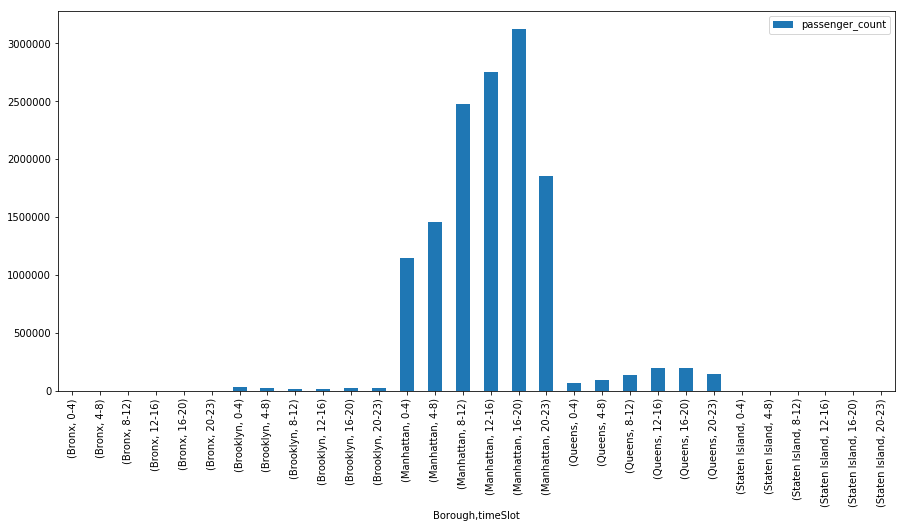

In [101]:
s= result.groupby(['Borough','timeSlot']).sum()
s.plot.bar(figsize=(15,7))

In [102]:
trasp=s.T

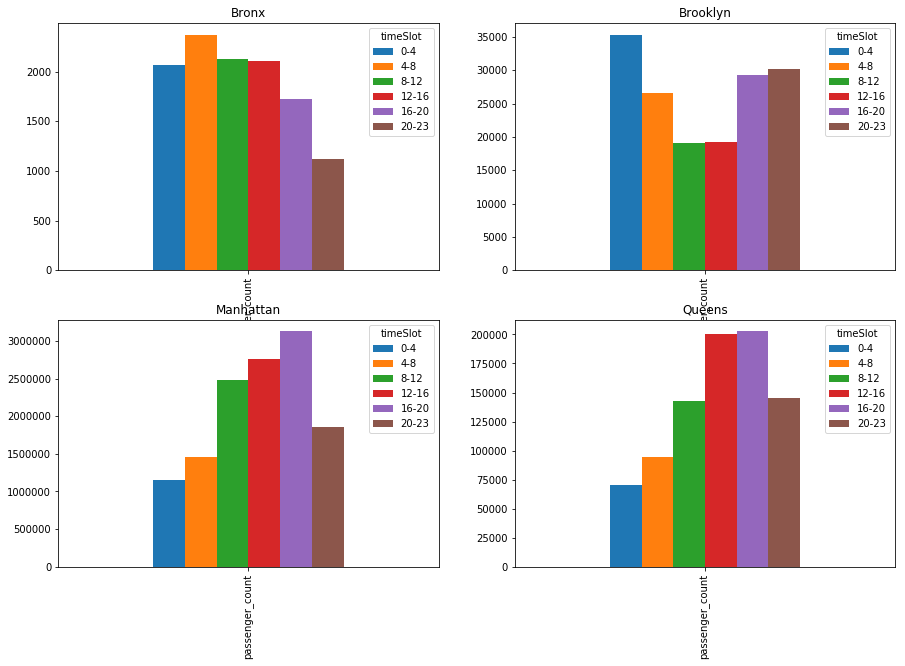

In [103]:

fig, axes = plt.subplots(nrows=2, ncols=2)
trasp.Bronx.plot.bar(title= 'Bronx',figsize=(15,10),ax=axes[0,0])

trasp.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,10),ax=axes[0,1])

trasp.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,10),ax=axes[1,0])

trasp.Queens.plot.bar(title= 'Queens',figsize=(15,10),ax=axes[1,1])

#Staten Island has very few data so we don't plot it, it's not statistically relevant

__Now we can repeat the analisys joning data from all months of 2018 that we have, and then see if they follow same patterns and comment.__

In [104]:
for i in range(2,7):
    df= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv", usecols = ['tpep_pickup_datetime','passenger_count', 'PULocationID'])
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['passenger_count'] = df['passenger_count'].astype(np.uint8)
    df['PULocationID'] = df['PULocationID'].astype(np.uint16)
    df['Year'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).year #for the sake of data cleaning
    df['Month'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).month #for the sake of data cleaning. We will keep this column. We need it after merging all the months together
    df['Day'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).day #for the sake of data cleaning. 
    df['Hour'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).hour #to create time slots
    df.drop(columns=['tpep_pickup_datetime'], inplace=True)
    df['Year'] = df['Year'].astype(np.uint16)
    df['Month'] = df['Month'].astype(np.uint8)
    df['Day'] = df['Day'].astype(np.uint8)
    df['Hour'] = df['Hour'].astype(np.uint8)
    years=list(df.Year.unique())
    for j in years:
        if j != 2018:
            df.drop(df[(df.Year == j)].index, inplace=True)
    Monthz=list(df.Month.unique())
    for k in Monthz:
        if k != i:
            df.drop(df[(df.Month == k)].index, inplace=True )
    df.drop(['Day', 'Year', 'Month'], axis=1, inplace=True)
    passe=list(df['passenger_count'].unique())
    ok=[1,2,3,4,5,6]
    for i in passe:
        if i not in ok:
            df.drop(df[(df.passenger_count == i)].index, inplace=True)
    df2= pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", usecols=['LocationID', 'Borough'])
    result = pd.merge(df,
                 df2,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
    del df
    del df2
    result.drop(['PULocationID', 'LocationID'], axis =1, inplace=True)
    result=result.assign(
    timeSlot=pd.cut(
        result['Hour'],
        [-1,4, 8, 12, 16, 20, 23],
        labels=['0-4','4-8', '8-12', '12-16', '16-20', '20-23']))
    result.drop(['Hour'], axis=1, inplace=True)
    s+= result.groupby(['Borough','timeSlot']).sum()
    

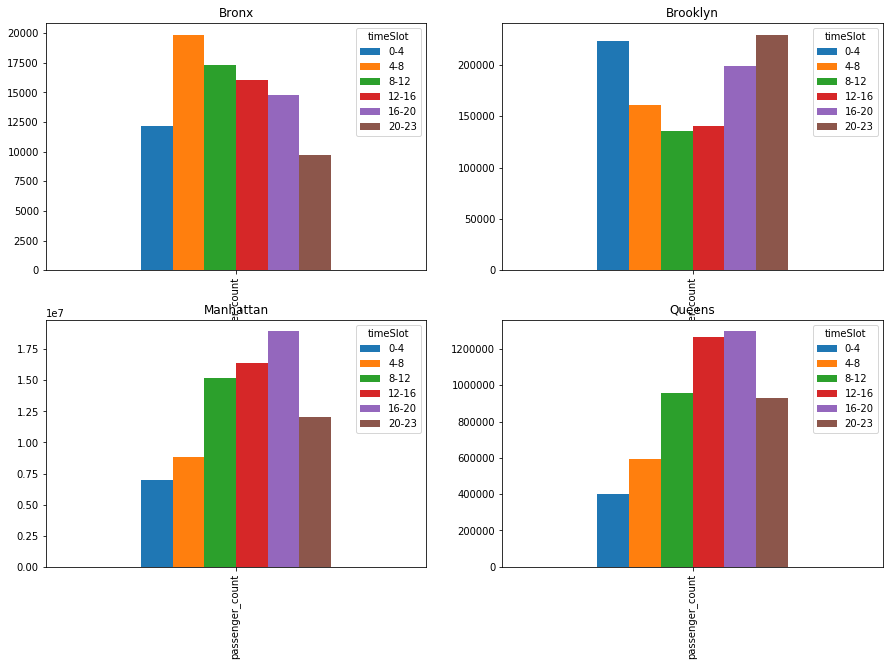

In [105]:
trasp=s.T
fig, axes = plt.subplots(nrows=2, ncols=2)
trasp.Bronx.plot.bar(title= 'Bronx',figsize=(15,10),ax=axes[0,0])
trasp.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,10),ax=axes[0,1])
trasp.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,10),ax=axes[1,0])
trasp.Queens.plot.bar(title= 'Queens',figsize=(15,10),ax=axes[1,1])

## RESULTS 
###### (Remebering that we conducted our analisys taking into account only pickups)

- __Bronx:__
We see that time slots with more passengers are early morning. Probably it's because people go to work. The trend decrease as the day goes on.
- __Brooklyn__:
We see that the distribution of Brooklyn concentrates in the night (0-4, 20-23). We think that's because Brooklyn has a lot of nightlife.
- __Queens and Manhattan__:
We see that time slots with more passengers are late afternoon. Probably it's because people take taxis to leave work and get home.
- __New York__: 
We don't need the plot to adfirm that the New York will follow the distro of Manahattan, since as we have seen answering other questions, almost every data comes from Manatthan and so Manhattan dominates the whole distro.

## RQ5

__Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.__

In [106]:
df=pd.DataFrame()

We have created an empty data frame in which now we store data of the months that we have.

In [107]:
frames=[]
for i in range(1,7):
    M1=pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-0"+str(i)+".csv" , encoding = 'latin-1',
               usecols=['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'])
    frames.append(M1)
    
df=pd.concat(frames,ignore_index=True)

Now for each trip, we compute the duration by minutes,as we did in rq3.

In [108]:
format_date='%Y-%m-%d %H:%M:%S'
pickup=pd.to_datetime(df['tpep_pickup_datetime'].str.strip(),format=format_date)
dropoff=pd.to_datetime(df['tpep_dropoff_datetime'].str.strip(), format=format_date)
difference=(dropoff-pickup).astype('timedelta64[m]')
df['Duration']=difference

A little bit of cleaning:

We add a columns called 'Year' that contains the year in order to delete all dirty data, because we have non-2018 data.

Then we delete rows that have distance and duration less or equal than 0. 

In [109]:
df['Year'] = df['tpep_pickup_datetime'].astype(str).str[0:4]
df=df[df['Year']=='2018']
df=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','Year'], axis=1)
df=df[df['trip_distance']>0]
df=df[df['Duration']>0]

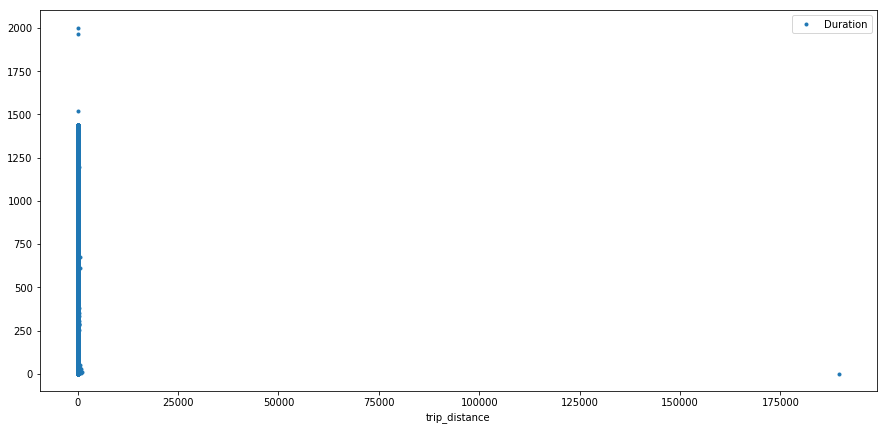

In [110]:
df.plot(x='trip_distance', y='Duration', style='.',figsize=(15,7))

We compute pearson correlation coefficent:

In [111]:
ro=df.corr(method='pearson').iat[0,1]
ro

0.022587538170123118

We see that trip_distance and duration are not correlated.

We are not satisfied. We may have still dirty datas since we have very long trips (more than what we would expect).
Let's see if for smaller durations and smaller trip distances we can find some correlations.

In [112]:
df=df[df['trip_distance']<50] #take only trips between one mile and fifty
df=df[df['Duration']<180] #take only trips that last between one and three hour

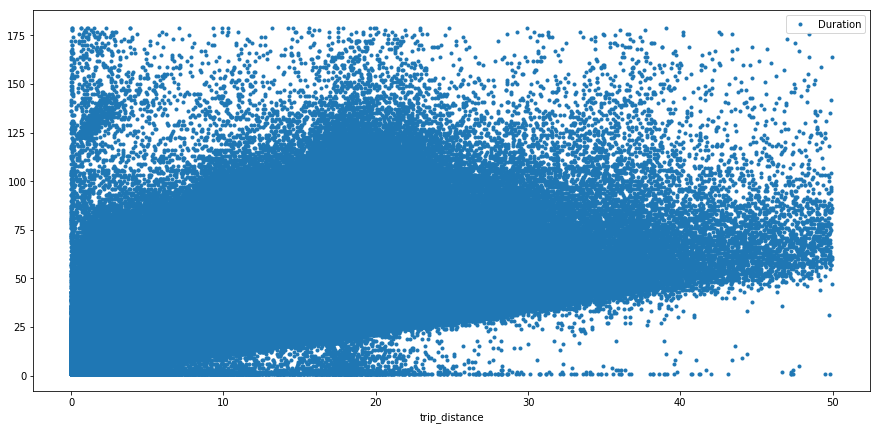

In [113]:
df.plot(x='trip_distance', y='Duration', style='.',figsize=(15,7))

In [114]:
ro=df.corr(method='pearson').iat[0,1]
ro

0.8022551580104583

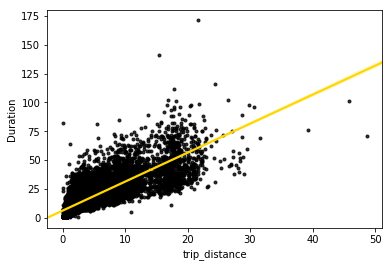

In [115]:
sns.regplot(x='trip_distance', y='Duration', data=df.sample(25000), color='black', marker='.', line_kws={'color':'gold'})

## RESULT

__Now we can adfirm that at least for "small" duration and distance we have a strong correlation (0.8).
Since the bound that we imposed it's not really "strict" we can say that probably the small ro of the first plot was due to dirtness of data.__<br><br><br>








# CRQ1
__Does the 'fare per mile' change among boroughs? aka, which boroughs charge the passengers with more money per mile?__<br>
__We need to consider the traffic congestion too. The price might depend on the trafic taxis find in their way.__<br>
__First, we do our analysation for a particulr month, January__<br>
__Then, we apply the analysis for all the 6 months.__

### January

In [139]:
#read the dataframe and pick those columns that we need
df=pd.read_csv(r'C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-01.csv', 
                 usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount'])

In [140]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,fare_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,41,4.5
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,239,14.0
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,262,6.0
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2,140,33.5
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,246,12.5


In [141]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 5 columns):
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
trip_distance            float64
PULocationID             int64
fare_amount              float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4 GB


In [142]:
#Two datetime 'objects'
#Change the type to 'datetime'.
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

#Duration of each trip in minutes
df['Duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/pd.Timedelta('1 minute')

#We need to extract month and year. We choose 'pickup' datetime
df['Year']=pd.DatetimeIndex(df['tpep_pickup_datetime']).year
df['Month']=pd.DatetimeIndex(df['tpep_pickup_datetime']).month

#we don't need these two columns anymore. to free up space, we drop them using 'inplace=True' so our the changes happen inside df object and a copy won't be made
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [143]:
df.head()

,trip_distance,PULocationID,fare_amount,Duration,Year,Month
0,0.5,41,4.5,3.300000,2018,1
1,2.7,239,14.0,18.166667,2018,1
2,0.8,262,6.0,5.916667,2018,1
3,10.2,140,33.5,32.483333,2018,1
4,2.5,246,12.5,17.800000,2018,1


In [144]:
df.shape

(8759874, 6)

In [145]:
#to see if any data cleaning is required for the 'Month' column. Only those rows with Month=1 should remain
df['Month'].unique() 

array([ 1, 12,  7,  2], dtype=int64)

In [146]:
#to see if any data cleaning is required for the 'Year' column. Only those rows with 'Year=2018' should remain
df['Year'].unique()

array([2018, 2017, 2002, 2008, 2009, 2001, 2003], dtype=int64)

In [147]:
#We drop dirty rows here
df.drop(df[(df.Month!=1) | (df.Year!=2018)].index, inplace=True)
#and drop 'Year' and 'Month' as we don't need them anymore
df.drop(columns=['Year','Month'], inplace=True) 

In [148]:
#a glance of the distribution of data in 'trip_distance' column
df['trip_distance'].describe()

count    8.759532e+06
mean     2.803989e+00
std      6.412471e+01
min      0.000000e+00
25%      9.100000e-01
50%      1.550000e+00
75%      2.840000e+00
max      1.894838e+05
Name: trip_distance, dtype: float64

In [149]:
#a glance of the distribution of data in 'fare_amount' column
df['fare_amount'].describe()

count    8.759532e+06
mean     1.224432e+01
std      1.168320e+01
min     -4.500000e+02
25%      6.000000e+00
50%      9.000000e+00
75%      1.350000e+01
max      8.016000e+03
Name: fare_amount, dtype: float64

In [150]:
#Data cleaning 
#now we clean 'fare_amount' and 'trip_distance' columns according to the result of .describe(). 

#for 'trip_distance', mean=2.8, std=64 
#This shows us that there are oulier vallues 
#The first 25%, 50% and 75% are 0.9, 1.5 and 2.8, respectively. Min=0 and Max=189483
#We see that these values are obvious outliers
#By setting a range of  0.5<trip_distance<3, we try to get rid of outliers hence, reduce the value for std
df.drop(df[(df.trip_distance<0.5)|(df.trip_distance>3)].index, inplace=True)


#For 'fare_amount', we see mean=12, std=11 
#Again, the value for std shows us there are ouliers
#first 25%=6, 50%=9 and 75%=13. Min=-4500, Max=8016 (obvious outliers)

df.drop(df[(df.fare_amount<1)|(df.fare_amount>15)].index, inplace=True)

In [151]:
#after the changes, for 'trip_distance', std=0.63
df['trip_distance'].describe()

count    6.125437e+06
mean     1.403180e+00
std      6.364946e-01
min      5.000000e-01
25%      9.000000e-01
50%      1.300000e+00
75%      1.820000e+00
max      3.000000e+00
Name: trip_distance, dtype: float64

In [152]:
#after the changes, for 'fare_amount', std is now =2.6
df['fare_amount'].describe()

count    6.125437e+06
mean     8.092768e+00
std      2.602843e+00
min      1.000000e+00
25%      6.000000e+00
50%      7.500000e+00
75%      1.000000e+01
max      1.500000e+01
Name: fare_amount, dtype: float64

In [153]:
df.shape

(6125437, 4)

### Part1: Find the fare amount per mile. For each borough, calculate mean and standard deviation of values. Plot the result and run the t-test on each pair of two boroughs possible

In [154]:
#here we calculate a new column and we call it 'price_per_mile'
#the values contained are equal to the amount each passenger pays for each mile of his or her trip
df['price_per_mile'] = df['fare_amount']/df['trip_distance']

In [155]:
#two columns 'trip_distance' and 'fare_amount' has served their purpose so we can drop them
df.drop(columns = ['trip_distance', 'fare_amount'], inplace=True)

In [156]:
#let's inverstigate the new column and have a glance into the statistics of it
df['price_per_mile'].describe()

count    6.125437e+06
mean     6.293948e+00
std      1.741622e+00
min      3.571429e-01
25%      5.000000e+00
50%      5.970149e+00
75%      7.142857e+00
max      3.000000e+01
Name: price_per_mile, dtype: float64

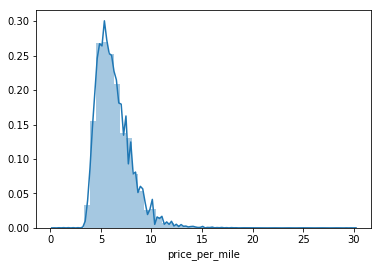

In [157]:
#We see that mean values for 'priec_per_mile'=6.2 and std=1.7
#25%=5, 50%=5.9 and 75%=7.1, Min=0.35 and max=30
#we feel the need to plot the distribution and see how normalized the plot is

sns.distplot(df['price_per_mile'])

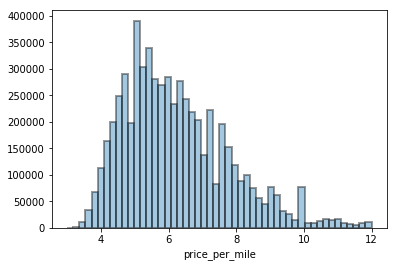

In [158]:
#As the plot shows, we can choose this range: 3<price_per_mile<12
#the bulk of the population is concentrated between these two numbers
df.drop(df[(df.price_per_mile<3)|(df.price_per_mile>12)].index, inplace=True)
sns.distplot(df['price_per_mile'], kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

In [159]:
#Read 'taxi_zone_lookup' dataset
borough = pd.read_csv(r'C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv', usecols = ['LocationID', 'Borough'])

In [160]:
#Merge df and borough 
result = pd.merge(df,
                 borough,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )

In [161]:
#now that by merging we have a new column called 'Borough' which contains the name of each contained borough for the zoneIDs, we can drop 'PULocationID' and 'LocationID'
#these two columns served as the joining key as they contained the same content
result.drop(columns = ['PULocationID', 'LocationID'], inplace =  True)

In [162]:
#see if 'Borough' column is clean
result['Borough'].unique()

array(['Manhattan', 'Brooklyn', 'Unknown', 'Queens', 'Bronx', 'EWR',
       'Staten Island'], dtype=object)

In [163]:
#we know there are 5 officail boroughs in NYC so we drop those rows with borough=Unknown and EWR.
#although EWR is a known area (an airport) in the city but it is not officially a borough
result.drop(result[(result.Borough=='Unknown') | (result.Borough=='EWR')].index, inplace=True)

In [164]:
df.head()

,PULocationID,Duration,price_per_mile
0,41,3.300000,9.000000
1,239,18.166667,5.185185
2,262,5.916667,7.500000
4,246,17.800000,5.000000
5,143,3.316667,9.000000


## Plotting

In [165]:
#see the mean of 'price_per_mile' for each borough
#we don't see a huge differenc among values. Just Manhattan has a slightly higer price
M=result.groupby('Borough')['price_per_mile'].mean()
print(M)

Borough
Bronx            5.714777
Brooklyn         5.659667
Manhattan        6.236856
Queens           5.445731
Staten Island    5.726651
Name: price_per_mile, dtype: float64


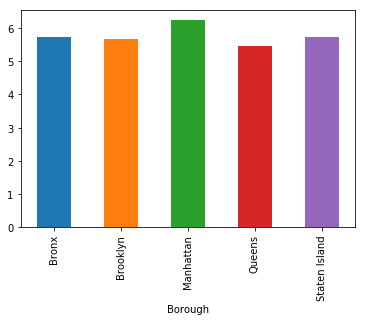

In [166]:
M.plot.bar()

In [167]:
S=result.groupby('Borough')['price_per_mile'].std()

In [168]:
print(S)

Borough
Bronx            1.392226
Brooklyn         1.386323
Manhattan        1.574355
Queens           1.339617
Staten Island    1.491341
Name: price_per_mile, dtype: float64


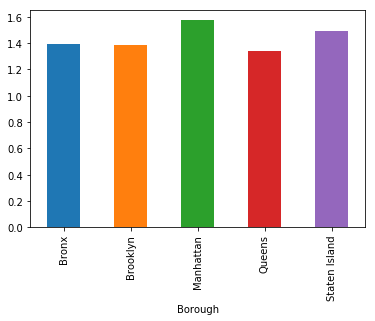

In [169]:
S.plot.bar()

### t-test

__We want to see if the difference between mean values of 'normalized price per month' for each pair of boroughs is significant__<br>
__we use t_test.__<br>
__With the help of python scipy library we calculate the value we want__<br>
__The function chosen is ttest_ind(a, b) from scypy.stats__<br>
__This function returns a tuple which contains (t-value, p-value)__<br>
__This is an independednt t-test(student t-test). Such a test assumes that the distribution of two populations (a, b) is equal.__ 
__We don't know if such is true for each pair, so through an argument inside 'ttest_ind()', we change the default student's test into what is called Welch's test__
>*ttest_ind(a,b, equal_var=False)*<br>

__Independent t-test tests the significant difference between the mean of two unrelated groups__<br>
__The hypothesis being tested is:__
-  Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
-  Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2<br>

__If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis__<br><br>



In [ ]:
#we create an empty, multi-indexed data-frame
#then fill it 
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens']
iterables = [['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens'], ['t-value', 'p-value', "H0 hypothesis"]]
my_index = pd.MultiIndex.from_product(iterables)
dt = pd.DataFrame(index=my_index, columns=boroughs)

In [ ]:
#filling the data-frame with t-value and p-value of each pair of boroughs
for i in boroughs:
    a = result.loc[result.Borough==i]["price_per_mile"]
    for j in boroughs:
            b = result.loc[result.Borough==j]["price_per_mile"]
            t2, p2 = stats.ttest_ind(a,b, equal_var=False)
            dt.loc[(i,"t-value"),j]=t2
            dt.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt.loc[(i,"H0 hypothesis"),j]='H0 accepted'
            else:
               dt.loc[(i,"H0 hypothesis"),j]='H0 Rejected'

In [172]:
dt

Bronx      Brooklyn     Manhattan  \
Bronx         t-value                   0        2.3138      -22.6247   
              p-value                   1     0.0207273  3.63475e-106   
              H0 hypothesis   H0 accepted   H0 Rejected   H0 Rejected   
Brooklyn      t-value             -2.3138             0      -96.6639   
              p-value           0.0207273             1             0   
              H0 hypothesis   H0 Rejected   H0 accepted   H0 Rejected   
Manhattan     t-value             22.6247       96.6639             0   
              p-value        3.63475e-106             0             1   
              H0 hypothesis   H0 Rejected   H0 Rejected   H0 accepted   
Staten Island t-value            0.050733      0.287504      -2.19057   
              p-value            0.959786      0.775209     0.0343709   
              H0 hypothesis   H0 accepted   H0 accepted   H0 Rejected   
Queens        t-value             -11.305      -25.6522       -134.21   
              p-value         3.31744e-29  1.09993e-144             0   
              H0 hypothesis   H0 Rejected   H0 Rejected   H0 Rejected   

                            Staten Island        Queens  
Bronx         t-value           -0.050733        11.305  
              p-value            0.959786   3.31744e-29  
              H0 hypothesis   H0 accepted   H0 Rejected  
Brooklyn      t-value           -0.287504       25.6522  
              p-value            0.775209  1.09993e-144  
              H0 hypothesis   H0 accepted   H0 Rejected  
Manhattan     t-value             2.19057        134.21  
              p-value           0.0343709             0  
              H0 hypothesis   H0 Rejected   H0 Rejected  
Staten Island t-value                   0       1.20576  
              p-value                   1      0.234985  
              H0 hypothesis   H0 accepted   H0 accepted  
Queens        t-value            -1.20576             0  
              p-value            0.234985             1  
              H0 hypothesis   H0 accepted   H0 accepted

__as we expected, in the diagonal of our matrix, p-value=1 thus we null hypothesis has been accepted (equality of mean )__<br><br>

### Part2: Taking traffic congestion into consideration and normalizing even more!

In [173]:
result.head()

,Duration,price_per_mile,Borough
0,3.300000,9.000000,Manhattan
1,10.333333,6.250000,Manhattan
2,3.650000,6.578947,Manhattan
3,6.750000,6.132075,Manhattan
4,13.133333,4.791667,Manhattan


In [174]:
#First let's take a look at the distribution of column 'Duration'
result['Duration'].describe()

count    5.963502e+06
mean     1.156598e+01
std      5.519776e+01
min      0.000000e+00
25%      5.850000e+00
50%      8.616667e+00
75%      1.221667e+01
max      1.519833e+03
Name: Duration, dtype: float64

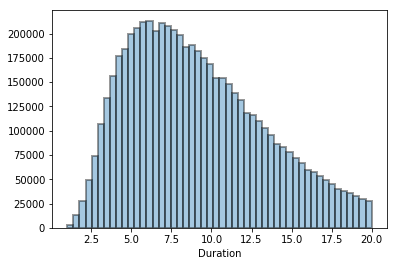

In [175]:
#according to the result of .describe(), we choose a range for 'Duration
# 5<Duration<20
result.drop(result[(result.Duration<1)|(result.Duration>20)].index, inplace=True)
sns.distplot(result['Duration'], kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

In [176]:
#We divide values in 'price_per_mile' by values in 'Duration' column
result['Normalized']=result['price_per_mile']/result['Duration']

In [177]:
result['Normalized'].describe()

count    5.803228e+06
mean     8.959665e-01
std      6.097313e-01
min      1.693480e-01
25%      4.671280e-01
50%      7.021376e-01
75%      1.128032e+00
max      9.504608e+00
Name: Normalized, dtype: float64

In [178]:
s=result.groupby('Borough')['Normalized'].mean()
print(s)

Borough
Bronx            0.887804
Brooklyn         0.900906
Manhattan        0.895492
Queens           0.943603
Staten Island    0.948258
Name: Normalized, dtype: float64


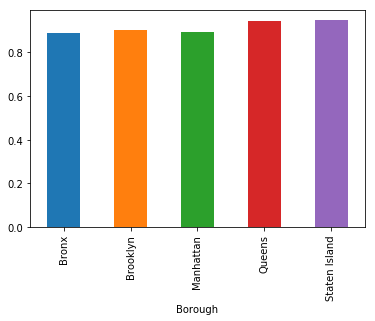

In [179]:
s.plot.bar()

In [180]:
m=result.groupby('Borough')['Normalized'].std()
print(s)

Borough
Bronx            0.887804
Brooklyn         0.900906
Manhattan        0.895492
Queens           0.943603
Staten Island    0.948258
Name: Normalized, dtype: float64


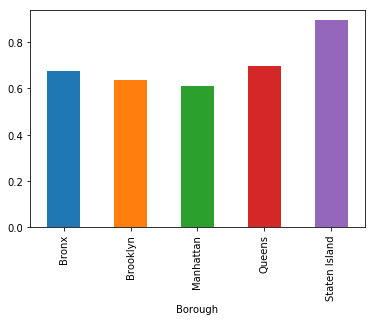

In [181]:
m.plot.bar()

### t-test

In [182]:
#an empty, multi-indexed data-frame
dt2 = pd.DataFrame(index=my_index, columns=boroughs)

In [183]:
#calculating t-value and p-value for each pair of borough in NYC
for i in boroughs:
    a = result.loc[result.Borough==i]['Normalized']
    for j in boroughs:
            b = result.loc[result.Borough==j]['Normalized']
            b = b.dropna()
            t2, p2 = stats.ttest_ind(a,b)
            dt2.loc[(i,"t-value"),j]=t2
            dt2.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt2.loc[(i,"H0 hypothesis"),j]='H0 accepted'
            else:
               dt2.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [184]:
dt2

Bronx     Brooklyn    Manhattan  \
Bronx         t-value                  0     -1.18612    -0.752585   
              p-value                  1     0.235579     0.451699   
              H0 hypothesis  H0 accepted  H0 accepted  H0 accepted   
Brooklyn      t-value            1.18612            0      2.05605   
              p-value           0.235579            1    0.0397776   
              H0 hypothesis  H0 accepted  H0 accepted    Reject H0   
Manhattan     t-value           0.752585     -2.05605            0   
              p-value           0.451699    0.0397776            1   
              H0 hypothesis  H0 accepted    Reject H0  H0 accepted   
Staten Island t-value           0.553934      0.46525     0.541449   
              p-value           0.579658     0.641754     0.588198   
              H0 hypothesis  H0 accepted  H0 accepted  H0 accepted   
Queens        t-value            4.63582       10.428      17.8625   
              p-value        3.56335e-06  1.89991e-25  2.32198e-71   
              H0 hypothesis    Reject H0    Reject H0    Reject H0   

                            Staten Island       Queens  
Bronx         t-value           -0.553934     -4.63582  
              p-value            0.579658  3.56335e-06  
              H0 hypothesis   H0 accepted    Reject H0  
Brooklyn      t-value            -0.46525      -10.428  
              p-value            0.641754  1.89991e-25  
              H0 hypothesis   H0 accepted    Reject H0  
Manhattan     t-value           -0.541449     -17.8625  
              p-value            0.588198  2.32198e-71  
              H0 hypothesis   H0 accepted    Reject H0  
Staten Island t-value                   0    0.0417952  
              p-value                   1     0.966662  
              H0 hypothesis   H0 accepted  H0 accepted  
Queens        t-value          -0.0417952            0  
              p-value            0.966662            1  
              H0 hypothesis   H0 accepted  H0 accepted

# 2018

In [186]:
DF = []

for i in range(1, 7):
    df2018 = pd.read_csv(r"C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-0{}.csv".format(i), usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount', 'PULocationID'])
    
    #change the type to datetime
    df2018['tpep_pickup_datetime']=pd.to_datetime(df2018['tpep_pickup_datetime'])
    df2018['tpep_dropoff_datetime']=pd.to_datetime(df2018['tpep_dropoff_datetime'])
    
    
    #extract necessary columns
    df2018['Year'] = pd.DatetimeIndex(df2018['tpep_pickup_datetime']).year 
    df2018['Month'] = pd.DatetimeIndex(df2018['tpep_pickup_datetime']).month
   
     
    #some data-cleaning
    yer = 2018
    mth = i
    #drop years other than 2018 and months other than 1 to 6
    df2018.drop(df2018[(df2018.Year != yer)|(df2018.Month != mth)].index, inplace=True)
    
    
    #we drop values which are not in range '0.5<trip_distance<5' and '1<fare_amount<20'
    #the values are aquired through an extention of the analysis of the first month
    df2018.drop(df2018[(df2018.trip_distance<0.5) | (df2018.trip_distance>5)].index, inplace=True)
    df2018.drop(df2018[(df2018.fare_amount<1) | (df2018.fare_amount>20)].index, inplace=True)
    
    
    #dropping locations with ID=1 wich refer to EWR and ID= 265 and 264 wich refer to Unknown
    df2018.drop(df2018[(df2018.PULocationID==1) |  (df2018.PULocationID==264) | (df2018.PULocationID==265)].index, inplace=True)
    
    
    #calculating 'price_per_mile'
    df2018['price_per_mile']=df2018['fare_amount']/df2018['trip_distance']
    #dropping those values<0
    df2018.drop(df2018[(df2018.price_per_mile<1) | (df2018.price_per_mile>15)].index, inplace=True)
    
    
    #calculating 'duration'
    df2018['duration']=(df2018['tpep_dropoff_datetime']-df2018['tpep_pickup_datetime'])/pd.Timedelta('1 minute')
    #dropping those outside of range 1<duration<30
    df2018.drop(df2018[(df2018.duration<1) | (df2018.duration>30)].index, inplace=True)
    
    
    df2018['Normalized']=df2018['price_per_mile']/df2018['duration']
    df2018.drop(df2018[(df2018.Normalized<1)].index, inplace=True)
    
    
    df2018.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime','fare_amount','trip_distance' ,'duration', 'Year', 'Month'], inplace=True)
    
    df2018=df2018.reset_index(drop=True)
    DF.append(df2018)
    
    del df2018

In [187]:
DF=pd.concat(DF)
DF=DF.reset_index(drop=True)

In [188]:
DF.head()

,PULocationID,price_per_mile,Normalized
0,41,9.000000,2.727273
1,262,7.500000,1.267606
2,143,9.000000,2.713568
3,239,5.714286,2.380952
4,238,5.500000,1.235955


In [189]:
#Read 'taxi_zone_lookup' dataset
borough = pd.read_csv(r'C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv', usecols = ['LocationID', 'Borough'])

In [190]:
#Merge df and borough 
dft = pd.merge(DF,
                 borough,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )


In [191]:
dft.drop(columns = ['PULocationID', 'LocationID'], inplace =  True)

In [192]:
dft.head()

,price_per_mile,Normalized,Borough
0,9.000000,2.727273,Manhattan
1,6.578947,1.802451,Manhattan
2,6.111111,1.164021,Manhattan
3,5.940594,1.024240,Manhattan
4,6.043956,1.237670,Manhattan


In [193]:
s=dft.groupby('Borough')['price_per_mile'].mean()

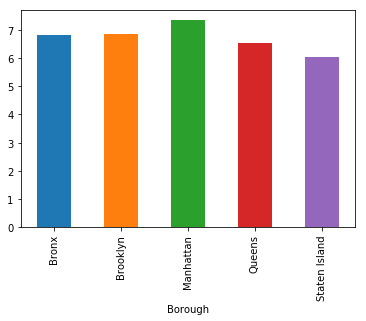

In [194]:
s.plot.bar()

In [195]:
m=dft.groupby('Borough')['price_per_mile'].std()

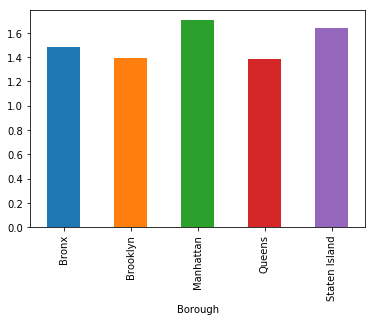

In [196]:
m.plot.bar()

In [205]:
#comparing the mean of 'Normalized' for each borough
s=dft.groupby('Borough')['Normalized'].mean()

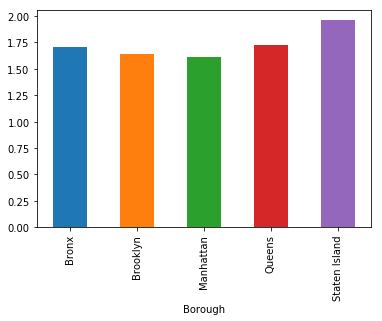

In [206]:
s.plot.bar()

__Considering the traffic, we see that the mean value in staten Island is greater than the rest__<br>
__Queens and Bronx are in the second place__<br>
__We need to check the standard deviation for each borough too__<br>

In [208]:
#comparing the mstd of 'Normalized' for each borough
m=dft.groupby('Borough')['Normalized'].std()

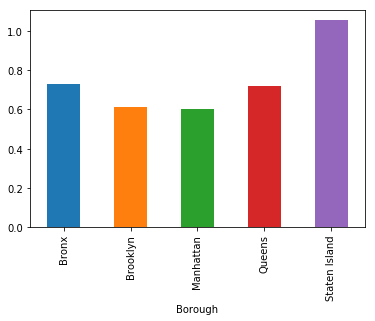

In [209]:
m.plot.bar()

__In Staten Island, std is the largest. This shows that the higher mean value is not correct and it is mainly due to the existence of the outlier values__<br>
__Manhattan has the lowest std, so it is possible to say that, Manhattan has the highest mean for normalized price_per_month__<br> 

# t-test

In [197]:
#a multi-indexed empty data frame
dt3=pd.DataFrame(index=my_index, columns=boroughs)

##### t-test based on the values in 'price_per_mile'

In [199]:
#calculating t-value and p-value for each pair of borough in NYC
for i in boroughs:
    a = dft.loc[dft.Borough==i]['price_per_mile']
    for j in boroughs:
            b = dft.loc[dft.Borough==j]['price_per_mile']
            #student_test
            t2, p2 = stats.ttest_ind(a,b)
            #fill in the dataframe 
            dt3.loc[(i,"t-value"),j]=t2
            dt3.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt3.loc[(i,"H0 hypothesis"),j]='H0 accepted'
            else:
               dt3.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [200]:
dt3

Bronx     Brooklyn     Manhattan  \
Bronx         t-value                   0     -2.06004      -24.8825   
              p-value                   1     0.039397  1.16196e-136   
              H0 hypothesis   H0 accepted    Reject H0     Reject H0   
Brooklyn      t-value             2.06004            0      -93.2525   
              p-value            0.039397            1             0   
              H0 hypothesis     Reject H0  H0 accepted     Reject H0   
Manhattan     t-value             24.8825      93.2525             0   
              p-value        1.16196e-136            0             1   
              H0 hypothesis     Reject H0    Reject H0   H0 accepted   
Staten Island t-value            -3.61595     -4.04282      -5.26503   
              p-value         0.000301534  5.28496e-05   1.40169e-07   
              H0 hypothesis     Reject H0    Reject H0     Reject H0   
Queens        t-value               -15.6     -51.2342      -147.619   
              p-value         8.41044e-55            0             0   
              H0 hypothesis     Reject H0    Reject H0     Reject H0   

                            Staten Island       Queens  
Bronx         t-value             3.61595         15.6  
              p-value         0.000301534  8.41044e-55  
              H0 hypothesis     Reject H0    Reject H0  
Brooklyn      t-value             4.04282      51.2342  
              p-value         5.28496e-05            0  
              H0 hypothesis     Reject H0    Reject H0  
Manhattan     t-value             5.26503      147.619  
              p-value         1.40169e-07            0  
              H0 hypothesis     Reject H0    Reject H0  
Staten Island t-value                   0     -2.51033  
              p-value                   1    0.0120636  
              H0 hypothesis   H0 accepted    Reject H0  
Queens        t-value             2.51033            0  
              p-value           0.0120636            1  
              H0 hypothesis     Reject H0  H0 accepted

##### t-test based on the values in 'Normalized' 

In [202]:
#a multi-indexed empty data-frame
dt4 = pd.DataFrame(index=my_index, columns=boroughs)

In [203]:
#calculating t-value and p-value for each pair of borough in NYC
for i in boroughs:
    a = dft.loc[dft.Borough==i]["price_per_mile"]
    for j in boroughs:
            b = dft.loc[dft.Borough==j]["price_per_mile"]
            #student_test
            t2, p2 = stats.ttest_ind(a,b)
            #fill in the data frame
            dt4.loc[(i,"t-value"),j]=t2
            dt4.loc[(i,"p-value"),j]=p2
            if(p2>0.05):
               dt4.loc[(i,"H0 hypothesis"),j]='H0 accepted'
            else:
               dt4.loc[(i,"H0 hypothesis"),j]='Reject H0'

In [204]:
dt4

Bronx     Brooklyn     Manhattan  \
Bronx         t-value                   0     -2.06004      -24.8825   
              p-value                   1     0.039397  1.16196e-136   
              H0 hypothesis   H0 accepted    Reject H0     Reject H0   
Brooklyn      t-value             2.06004            0      -93.2525   
              p-value            0.039397            1             0   
              H0 hypothesis     Reject H0  H0 accepted     Reject H0   
Manhattan     t-value             24.8825      93.2525             0   
              p-value        1.16196e-136            0             1   
              H0 hypothesis     Reject H0    Reject H0   H0 accepted   
Staten Island t-value            -3.61595     -4.04282      -5.26503   
              p-value         0.000301534  5.28496e-05   1.40169e-07   
              H0 hypothesis     Reject H0    Reject H0     Reject H0   
Queens        t-value               -15.6     -51.2342      -147.619   
              p-value         8.41044e-55            0             0   
              H0 hypothesis     Reject H0    Reject H0     Reject H0   

                            Staten Island       Queens  
Bronx         t-value             3.61595         15.6  
              p-value         0.000301534  8.41044e-55  
              H0 hypothesis     Reject H0    Reject H0  
Brooklyn      t-value             4.04282      51.2342  
              p-value         5.28496e-05            0  
              H0 hypothesis     Reject H0    Reject H0  
Manhattan     t-value             5.26503      147.619  
              p-value         1.40169e-07            0  
              H0 hypothesis     Reject H0    Reject H0  
Staten Island t-value                   0     -2.51033  
              p-value                   1    0.0120636  
              H0 hypothesis   H0 accepted    Reject H0  
Queens        t-value             2.51033            0  
              p-value           0.0120636            1  
              H0 hypothesis     Reject H0  H0 accepted

# Observation
<br>
-   __On the diagonal of our matrix, all the (t-values, p_value) tuples are (0,1). This makes sense as a and b are both the same borogh so the mean is equal and H0 is accepted__<br>
-  __We see negative t_values. A negative t-value indicates a reversal in the directionality of the effect, which has no bearing on the significance of the difference between groups. In our calculations, we have pairs like (Bronx, Brooklyn) and (Brooklyn, Bronx) so, the t-value for them will be the same with a difference in its sign. __<br>
